<h3>About this project</h3>

This is an educational project workthrough. It is based on the often-used *California Housing Prices* dataset, which contains California census data from 1990. The scenario from the book is that a company has the problem of having to manually estimate housing prices - in order to avoid this effort in the future, they create a team that is supposed to solve this problem via Machine Learning. 

It contains a lot of comments and reflections for personal documentation and clarification.


In [7]:
#import sys
#!{sys.executable} -m pip install pandas matplotlib zlib scikit-learn

<h3>Preparation<h3/>

In [8]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

#calling this function creates a datasets/housing directory in my workspace,downloads the
#housing.tgz file and from that extracts the housing.tgz file in this directory

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
    

In [9]:
fetch_housing_data()


In [10]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

<h3>Taking a first look at the data</h3>

In [11]:
housing = load_housing_data()
housing.head() 
#gives te top five rows of the pandas data frame object
#each row represents one district


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
#Provides general information about the dataset, total number of rows (amount of districts), type of each
#attribute and the number of non null values. Note that the value "amount of total bedrooms" is null in
#207 districts.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
#shows which types of values there are in the housing data and how many districts belong to each category
housing["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* *count* decribes the count of values in each attribute (null values are ignored) <br />
* *std* = standard deviation/ dispersion of values <br />
* *percentiles* indicate the value below which a given percentage in a group of observations fall,
     example: 25% of the districts have a housing median age below 18, 50 % below 29 and so on. It is 
     referred to as first quartile (25th percentile), median (50th), third quartile (75th).





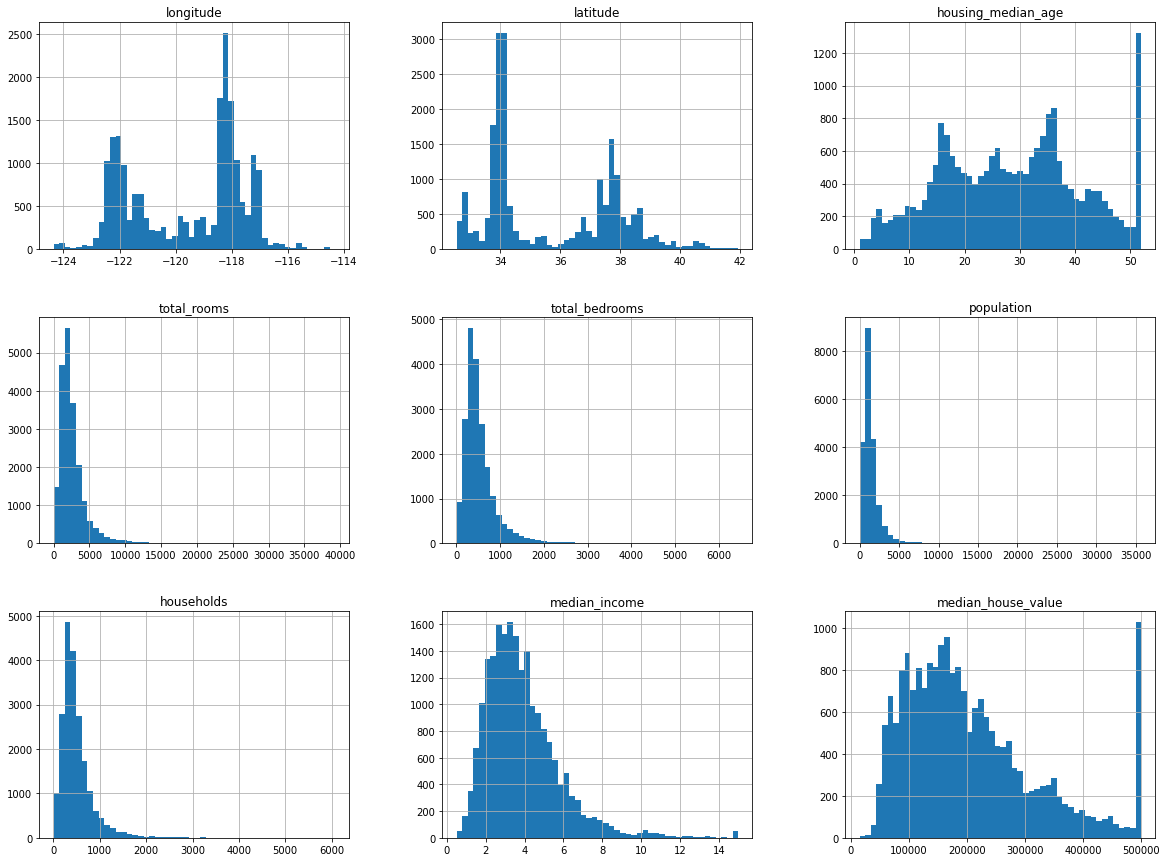

In [15]:
%matplotlib inline 
##uses jupyters own backend for inline plotting
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show() #optional

**Oberservations from plots:** <br/>
* housing median ange, median income and median house value are preprocessed. <br />
* median income is scaled, value = value * tens of thousands -> 6 equals 60.000 USD <br />
* median house value was capped at 500k, ML algorithm might learn that house values do not go over that price --> problem, as this is the target value of our problem. <br />
* median income also seems to be capped <br />
* differences in scaling <br />
* tail heavy - histograms extend more to the right of the median <br />
* avoid snooping bias from first impressions! <br/>

<h3>Creating a test set</h3>


In [16]:
import numpy as np

#function for splitting data into train set and test set 
def split_train_test(data, test_ratio): 
    shuffled_indices = np.random.permutation(len(data))
    #test set size = 20 per cent of dataset size
    test_set_size = int(len(data) * test_ratio) 
    
    test_indices = shuffled_indices[:test_set_size] #first 80% of shuffled indices
    train_indices = shuffled_indices[test_set_size:] #remaining 20% of shuffled indices
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
train_set, test_set = split_train_test(housing, 0.2)

In [18]:
len(train_set)


16512

In [19]:
len(test_set)


4128

**These two solutions are not stable as everytime we run the code again it will create a different train and test split and data that was in train before will go into test and vice versa.**

**Possible "solutions":**
* save test set on first run and then load it in subsequent runs
* setting the seed of np.random.permutation so that it always generates the same shuffled indices

But also these will break if we want to fetch an updated dataset. We want to have a stable train/test split that remains stable also when updating the data.

**A common solution for this issue:**
* use each instances identifier to decide whether or not they should go in the test set (assuming that each instance has a unique and immutable identifier
* we have the possibility of computing a hash of each instances identifier and decide whether if goes into train or test based on the hash being f.e. higher or lower (lower/equal) than 20% of the max hash value.
* this ensures that even if we refresh the data set the new test set will contain 20% of the new instances while also keeping it guaranteed that
    * the "old" values stay in the test set
    * 20% of the new values are in the test set
    * no value from the train set will go into the test set
    
This is what an implementation of that principle looks like:

In [20]:
from zlib import crc32 

#zlib is a library for data compression
#zlib.crc32() method computes the unsigned 32-bit checksum for given data

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [21]:
#the housing dataset does not have an identifier column, simple solution: using row index as id 
#however here have to always ensure that new data gets appended to the end of the dataset and no row is ever deleted

housing_with_id = housing.reset_index() #pandas function for adding index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")



In [22]:
#alternative: using most stable features to build unique identifier
#f.e. longitude/latitude will remain stable; we can combine them into a unique id like so:

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")



In [23]:
#scikit-learn provides some functions for data set splitting, simplest being train_test_split()
from sklearn.model_selection import train_test_split

#works similarly to split_train_test; offers feature to set a seed and to load multiple datasets of identical
#number of rows that it can then split on same indices (useful if we have f.e. labels seperately)

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

We only split train and test so far using randomized splitting - this can make our model prone to sampling bias, as we have not yet considered that our test set should be as representative as possible of the underlying dataset. Thus we will look at the data again in order to find important ratios *(strata)* that have to be maintained and reflected in the sample. This is called *stratified sampling*.

In this project we suppose that we have gotten information from experts that the median income is very important for the prediction of housing prices. That means we have to look at the median income data and make sure that we have a sufficient amount of data for each category of income. Like that, we keep the test set representative of the whole dataset and lower the risk of the estimate of a stratums importance being biased. We should have neither too many nor to few strata and they should each be big enough.

We are using pd.cut() for that purpose, a function that bins values into discrete intervals. Binning is a technique used in data processing and statistics. It describes class formation in pre-processing during data analysis. A given set of sorted values is divided into intervals (bins). Each of these intervals is then designated by a representative, also called interval labels. Binning is often used when there is more possible data than is actually needed - for example, body sizes of people can be divided into intervals or categories.



In [24]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                                bins = [0, 1.5, 3, 4.5, 6, 
                                np.inf],labels = [1, 2, 3, 4, 5])

<AxesSubplot:>

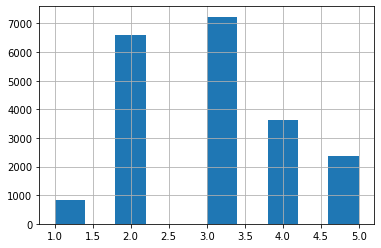

In [25]:
housing["income_cat"].hist()

Now we can start stratified sampling - we are using Scikit-Learn's StratifiedShuffleSplit class.

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]



We can now take look at the income category proportions in the test set:

In [27]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

This following code gives us a table that gives us the sampling bias comparison of startified versus purely random sampling.


In [28]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100


In [29]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


Here we can see clearly that the startified error is significantly smaller for each bin and we have a significantly improved the representation of the proportions in the subset. Thus, we mimimized the chance of sampling bias and will have a better base for our predictions.

Now we have to remove the income_cat attribute so the data goes back to its original state

In [30]:
#check if its attribute is in strat train set
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [31]:
#same for test set
strat_test_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3


In [32]:
#note to self: will give error if run multiple times as the axis will be removed and thus not found
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<h3>Discovering and visualizing the data to get insights</h3>



We now have a general understanding of the data we are working with. To get a bit more in depth now we will now get a copy of the training set in order to dain deeper insights through visualization. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

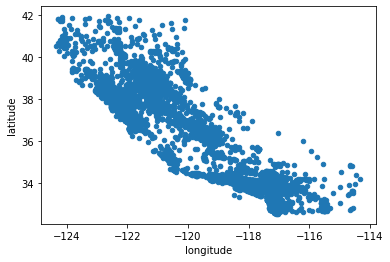

In [33]:
#getting the copy to not harm the original train set
#if the dataset is very large, it is also an option to sample an exploration set (a stratified subset)
housing = strat_train_set.copy()

#due to the fact that we are working with geographical data we can nicely plot a scatterplot along the axes of 
#longitude and latitude - resulting in a data cloud shaped like california.
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

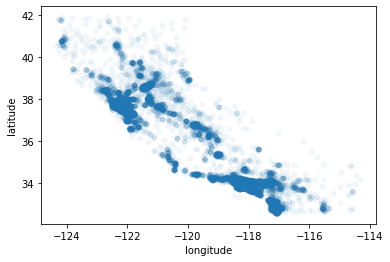

In [36]:
#setting alpha parameter in order to better visualize density
#playing aroud with visualization parameters is great way to explore and find patterns
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

This plot very well visualizes the areas with higher density: along the coast, Los Angeles, San Diego and Central Valley. These areas are significantly more pronounces when setting alpha even smaller:

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

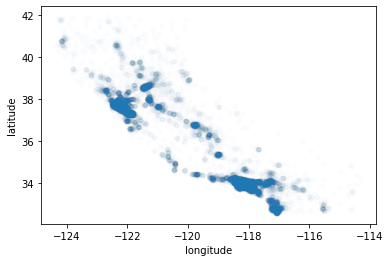

In [38]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.01)

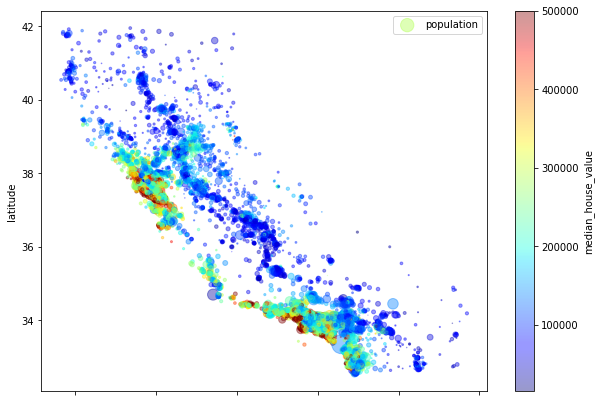

In [46]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, 
             #option s makes size of each circle represent the districts population size
             s = housing["population"]/100, label = "population", figsize = (10,7),
             #option c makes the colors represent the prices
             #for this we use predefinded colormap "jet" raning from low (blue) to high prices(red)
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True
)

plt.legend()

What general trends does the image show us?

* the highest prices tend to be along the coast - this indicates ocean proximity to be an influential factor
* the lowest prices tend to be more in areas of lew population density, more inland
* the trend seems that the further away from the ocean (generalizing here) the less expensive housing becones
* housing seems to be more expensive in the bigger cities 
* the combination of proximity to bigger cities and the ocean apparently more often than not leads to higher housing prices
* in the north housing prices thus may be lower even though bay proximity is high, as there are no bigger cities close by


<h3>Looking for Correlations</h3>